# Background  
Considerar una mutacion por residuo (es decir, mutado o no)  
background = total_res_mutados / total_res  
idr_enrichment_mut = ( idr_res_mutados / idr_res ) / background  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
mutation = pd.read_csv('../db_tables/mutation_new.tsv.gz', sep= '\t', compression='gzip')
protein = pd.read_csv(
    '../db_tables/protein.tsv',
    sep='\t',
    usecols=['id_protein', 'length']
)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Background  
## Total mutations rate

In [3]:
# Traer los residuos mutados en todas las proteinas
mutation_unique = mutation[['id_protein', 'start_aa']].drop_duplicates()
mutation_unique

,id_protein,start_aa
0,3155,442
1,3155,480
2,3155,500
3,3155,503
4,3155,69
...,...,...
1660052,4348,789
1660053,4348,1328
1660054,4349,337
1660057,4362,400


In [4]:
total_mut_aa = len(mutation_unique)

In [5]:
total_mutations = mutation.shape[0]

In [6]:
# Background considering only mutated residues
background = total_mut_aa / protein.length.sum()
background

0.3324530232317951

In [7]:
# considering all the mutations
total_mutations / protein.length.sum()

0.4464915083560875

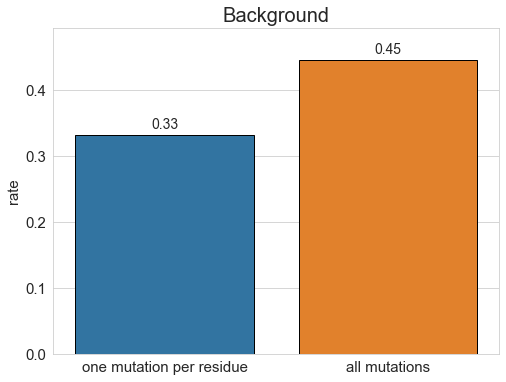

In [8]:
y = [background, total_mutations / protein.length.sum()]
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
fig = sns.barplot(x=['one mutation per residue', 'all mutations'], y= y, edgecolor= 'black')
plt.title("Background", fontsize= 20)
plt.ylabel("rate", fontsize= 15)
plt.tick_params(labelsize=15)
for i, v in enumerate(y):
    fig.text(i, v+.01, str(f'{v:.2f}'), fontsize= 14, ha= 'center')
plt.ylim(0, 0.495)
#plt.savefig('analysis/bar_background.png', dpi= 300)
plt.show()

# IDRs mutations

In [9]:
# Load IDRs
disorder_region = pd.read_csv('../db_tables/disorder_region.tsv', sep='\t')
mutation_has_disorder = pd.read_csv('../db_tables/mutation_has_disorder_region.tsv', sep='\t')

In [10]:
disorder_region.sort_values("id_idr")

,start,end,id_idr,length,id_protein
6562,234,255,1,22,4305
3042,1,52,2,52,1998
6900,1,55,3,55,4567
6901,475,497,4,23,4567
4080,1,96,5,96,2607
...,...,...,...,...,...
8054,401,482,8695,82,5300
8368,174,209,8696,36,5509
8377,1,24,8697,24,5521
8549,1,88,8698,88,5650


In [11]:
mutation_has_disorder

,id_mutation,id_idr
0,35995,7538
1,35996,7538
2,35997,7538
3,35998,7540
4,35999,7538
...,...,...
256126,738065,3393
256127,738067,3393
256128,1581702,3393
256129,551013,3305


In [12]:
dis_mutations = mutation_has_disorder.merge(disorder_region, how= 'left')
dis_mutations.sort_values("id_mutation")

,id_mutation,id_idr,start,end,length,id_protein
75220,114,6368,39,79,41,1628
75221,115,6367,1,27,27,1628
75222,122,6371,1120,1142,23,1628
75223,137,6367,1,27,27,1628
76121,151,3841,84,103,20,1659
...,...,...,...,...,...,...
203518,1647022,3616,1,35,35,4462
203519,1647023,3616,1,35,35,4462
203520,1647025,3616,1,35,35,4462
203521,1647027,3616,1,35,35,4462


In [13]:
len(dis_mutations.id_mutation.unique())

256124

In [14]:
dis_mutations[dis_mutations.id_mutation.duplicated()]

,id_mutation,id_idr,start,end,length,id_protein
86411,553395,472,1526,1569,44,1876
86412,553395,473,1583,1611,29,1876
86426,557234,469,1190,1244,55,1876
86427,557234,470,1311,1376,66,1876
86428,557234,471,1403,1475,73,1876
172685,549975,6417,217,291,75,3492
172692,556313,6417,217,291,75,3492


In [15]:
dis_mutations[dis_mutations.id_mutation == 553395]

,id_mutation,id_idr,start,end,length,id_protein
86410,553395,471,1403,1475,73,1876
86411,553395,472,1526,1569,44,1876
86412,553395,473,1583,1611,29,1876


In [16]:
'''# Mutations in IDRs
dis_mutations = mutation_has_disorder.merge(disorder_region[['id_idr', 'length', 'id_protein']], how= 'left')
dis_mutations.sort_values("id_mutation")'''

'# Mutations in IDRs\ndis_mutations = mutation_has_disorder.merge(disorder_region[[\'id_idr\', \'length\', \'id_protein\']], how= \'left\')\ndis_mutations.sort_values("id_mutation")'

In [17]:
# Traer la posicion de los aa mutados
dis_mutations_aa = mutation[['id_mutation', 'start_aa']][mutation[['id_mutation', 'start_aa']].id_mutation.isin(dis_mutations.id_mutation)]
dis_mutations_aa

,id_mutation,start_aa
113,114,62
114,115,20
121,122,1126
136,137,22
150,151,89
...,...,...
1647021,1647022,28
1647022,1647023,8
1647024,1647025,17
1647026,1647027,13


In [18]:
dis_mutations_aa.duplicated().any()

False

In [19]:
dis_mutations = dis_mutations.merge(dis_mutations_aa, how='left')
dis_mutations

,id_mutation,id_idr,start,end,length,id_protein,start_aa
0,35995,7538,1,286,286,1,49
1,35996,7538,1,286,286,1,51
2,35997,7538,1,286,286,1,97
3,35998,7540,444,526,83,1,488
4,35999,7538,1,286,286,1,64
...,...,...,...,...,...,...,...
256126,738065,3393,260,325,66,5738,282
256127,738067,3393,260,325,66,5738,295
256128,1581702,3393,260,325,66,5738,273
256129,551013,3305,1,22,22,5739,17


In [20]:
dis_mutations.duplicated().any()

False

In [21]:
# Verificar aquellas mutaciones que no caen dentro del rango del IDR
dis_mutations["ctrl"] = True
for i in dis_mutations.index:
    position = dis_mutations.start_aa[i]

    if position >= dis_mutations.start[i] and position <= dis_mutations.end[i]:
        dis_mutations.ctrl[i] = True
    else:
        dis_mutations.ctrl[i] = False


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [22]:
dis_mutations.ctrl.sum()

256029

In [23]:
dis_mutations[dis_mutations.ctrl == False]

,id_mutation,id_idr,start,end,length,id_protein,start_aa,ctrl
3549,550812,7601,361,389,29,38,356,False
5520,62947,2908,419,462,44,71,409,False
5727,61236,2053,282,325,44,75,281,False
5729,62706,2053,282,325,44,75,280,False
5730,63261,2053,282,325,44,75,278,False
...,...,...,...,...,...,...,...,...
201751,557408,3013,574,654,81,4425,573,False
210876,553211,2135,318,346,29,4659,314,False
233067,556090,4125,956,1028,73,5130,947,False
235802,553124,5344,1166,1243,78,5217,1164,False


In [24]:
dis_mutations = dis_mutations[dis_mutations.ctrl == True]

In [25]:
# Considerar una mutacion por residuo IDR. Ya no importa el id_mutation
dis_mutations.drop_duplicates(['id_protein', 'start_aa'], inplace= True)
dis_mutations

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_mutation,id_idr,start,end,length,id_protein,start_aa,ctrl
0,35995,7538,1,286,286,1,49,True
1,35996,7538,1,286,286,1,51,True
2,35997,7538,1,286,286,1,97,True
3,35998,7540,444,526,83,1,488,True
4,35999,7538,1,286,286,1,64,True
...,...,...,...,...,...,...,...,...
256124,738056,3393,260,325,66,5738,263,True
256126,738065,3393,260,325,66,5738,282,True
256127,738067,3393,260,325,66,5738,295,True
256128,1581702,3393,260,325,66,5738,273,True


In [26]:
dis_mutations.duplicated().any()

False

In [27]:
dis_mutations.groupby("id_protein")['start_aa'].count().sort_values()

id_protein
5739       1
4180       1
3299       1
1115       1
3506       1
        ... 
5665     911
2623    1317
1876    1444
3450    1955
3387    2380
Name: start_aa, Length: 3234, dtype: int64

### idr_enrichment_mut
idr_enrichment_mut = ( idr_res_mutados / idr_res ) / background  

In [28]:
# Total of mutated IDR's aa
total_mut_idr_aa = dis_mutations.shape[0]

In [29]:
# Total IDRs aa
total_idr_aa = disorder_region.length.sum()

In [30]:
enrichment_idr = (total_mut_idr_aa/ total_idr_aa) / background
enrichment_idr

0.9925368123784425

# LCR mutations

In [31]:
# Load data
low_complexity = pd.read_csv('../db_tables/low_complexity.tsv', sep='\t')
mutation_has_lc = pd.read_csv('../db_tables/mutation_has_low_complexity.tsv', sep='\t')

In [32]:
low_complexity

,start,end,id_lc,length,id_protein
0,236,243,1,8,1679
1,235,247,2,13,2077
2,230,244,3,15,2349
3,234,244,4,11,3184
4,2,18,5,17,1998
...,...,...,...,...,...
18280,37,58,18322,22,5509
18281,65,78,18323,14,5509
18282,160,176,18324,17,5509
18283,185,218,18325,34,5509


In [33]:
lc_mutations = mutation_has_lc.merge(low_complexity, how='left')
lc_mutations

,id_mutation,id_lc,start,end,length,id_protein
0,35995,15785,17,104,88,1
1,35996,15785,17,104,88,1
2,35997,15785,17,104,88,1
3,35998,15788,450,507,58,1
4,35999,15785,17,104,88,1
...,...,...,...,...,...,...
155019,1048138,14495,92,111,20,5740
155020,1048141,14495,92,111,20,5740
155021,1048144,14495,92,111,20,5740
155022,1048181,14496,125,139,15,5740


In [34]:
# Traer la posicion de los aa mutados
lc_mutations_aa = mutation[['id_mutation', 'start_aa']][mutation[['id_mutation', 'start_aa']].id_mutation.isin(lc_mutations.id_mutation)]
lc_mutations_aa

,id_mutation,start_aa
33,34,136
46,47,135
68,69,138
71,72,427
75,76,132
...,...,...
1647012,1647013,25
1647016,1647017,35
1647017,1647018,34
1647018,1647019,35


In [35]:
lc_mutations_aa.duplicated().any()

False

In [36]:
lc_mutations = lc_mutations.merge(lc_mutations_aa).rename(columns= {'start_aa': 'position'})
lc_mutations

,id_mutation,id_lc,start,end,length,id_protein,position
0,35995,15785,17,104,88,1,49
1,35996,15785,17,104,88,1,51
2,35997,15785,17,104,88,1,97
3,35998,15788,450,507,58,1,488
4,35999,15785,17,104,88,1,64
...,...,...,...,...,...,...,...
155019,1048138,14495,92,111,20,5740,99
155020,1048141,14495,92,111,20,5740,100
155021,1048144,14495,92,111,20,5740,110
155022,1048181,14496,125,139,15,5740,135


In [37]:
# Considerar una mutacion por residuo Low-complexity. Ya no importa el id_mutation
lc_mutations.drop_duplicates(['id_protein', 'position'], inplace= True)
lc_mutations

,id_mutation,id_lc,start,end,length,id_protein,position
0,35995,15785,17,104,88,1,49
1,35996,15785,17,104,88,1,51
2,35997,15785,17,104,88,1,97
3,35998,15788,450,507,58,1,488
4,35999,15785,17,104,88,1,64
...,...,...,...,...,...,...,...
155015,1048084,14495,92,111,20,5740,107
155016,1048094,14495,92,111,20,5740,110
155019,1048138,14495,92,111,20,5740,99
155020,1048141,14495,92,111,20,5740,100


In [38]:
# Cuanto residuos mutados tiene cada proteina con regiones LCR
lc_mutations.groupby("id_protein")["position"].count().sort_values()

id_protein
2901       1
438        1
3262       1
1244       1
3272       1
        ... 
2623     567
5665     575
3387     722
3450    1052
5106    1164
Name: position, Length: 4103, dtype: int64

In [39]:
# OK. No hay duplicados por el id_mutation
#lc_mutations.drop(columns=['id_mutation']).drop_duplicates()

In [40]:
# Hay posiciones fuera del rango del dominio. Eliminar
lc_mutations[lc_mutations.id_lc == 5789].sort_values('position')

,id_mutation,id_lc,start,end,length,id_protein,position
24308,554182,5789,322,334,13,798,274
24309,554188,5789,322,334,13,798,317
24307,554178,5789,322,334,13,798,319
24257,19720,5789,322,334,13,798,322
24269,70514,5789,322,334,13,798,323
24295,130295,5789,322,334,13,798,324
24266,60795,5789,322,334,13,798,325
24267,62545,5789,322,334,13,798,326
24259,19766,5789,322,334,13,798,327
24322,592247,5789,322,334,13,798,328


In [41]:
lc_mutations["ctrl"] = True
for ix, row in lc_mutations.iterrows():
    #print(ix, row["position"])
    if row["position"] < row["start"] or row["position"] > row["end"]:
        lc_mutations["ctrl"][ix] = False

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [42]:
# True values
lc_mutations.ctrl.sum() # 114403
lc_mutations = lc_mutations[lc_mutations.ctrl == True]

In [43]:
total_mut_lc_aa = lc_mutations.shape[0]
total_lc_aa = low_complexity.length.sum()

In [44]:
enrichment_lc = (total_mut_lc_aa / total_lc_aa) / background
enrichment_lc

0.9858385528686409

# PLDs mutations

In [45]:
# Load data
pfam_domain = pd.read_csv('../db_tables/pfam_domain_new.tsv', sep='\t')
mutation_has_pfam_domain = pd.read_csv('../db_tables/mutation_has_pfam_domain_new.tsv', sep='\t')
protein_has_pfam_domain = pd.read_csv('../db_tables/protein_has_pfam_domain_new.tsv', sep='\t')

In [46]:
# Subset only PLDs domains
protein_has_pfam_domain = protein_has_pfam_domain[protein_has_pfam_domain.id_pfam.str.startswith("PLD")].sort_values('id_pfam')
protein_has_pfam_domain

,id_pfam,start,end,id_protein,length
8933,PLD1,588,647,3536,60
10603,PLD10,197,256,4382,60
12673,PLD100,956,1015,5130,60
11480,PLD101,1553,1612,4737,60
11340,PLD102,623,682,4668,60
...,...,...,...,...,...
218,PLD95,1375,1434,60,60
9794,PLD96,63,122,4010,60
1756,PLD97,88,147,646,60
10363,PLD98,519,578,4274,60


In [47]:
mutation_has_pfam_domain

,id_mutation,id_protein,id_pfam,start,end
0,543657,1,PF00076,287,365
1,217976,1,PF00076,287,365
2,543665,1,PF00076,287,365
3,543684,1,PF00076,287,365
4,1555283,1,PF00076,287,365
...,...,...,...,...,...
786131,1015071,5741,PF12765,1794,1835
786132,211638,5741,PF12765,1794,1835
786133,96872,5741,PF12765,1794,1835
786134,1603588,5741,PF12765,1794,1835


In [48]:
pld = pfam_domain[pfam_domain.pfam_domain == "PLD"]
pld

,id_pfam,pfam_domain
3581,PLD1,PLD
3582,PLD2,PLD
3583,PLD3,PLD
3584,PLD4,PLD
3585,PLD5,PLD
...,...,...
3712,PLD132,PLD
3713,PLD133,PLD
3714,PLD134,PLD
3715,PLD135,PLD


In [49]:
pld_mutations = mutation_has_pfam_domain[mutation_has_pfam_domain.id_pfam.str.startswith("PLD")]
pld_mutations.sort_values('id_pfam')

,id_mutation,id_protein,id_pfam,start,end
529398,1658499,3536,PLD1,588,647
529378,552980,3536,PLD1,588,647
529379,581804,3536,PLD1,588,647
529380,383247,3536,PLD1,588,647
529381,383257,3536,PLD1,588,647
...,...,...,...,...,...
280689,1594266,1961,PLD99,88,147
280687,898704,1961,PLD99,88,147
280686,898728,1961,PLD99,88,147
280699,319764,1961,PLD99,88,147


In [50]:
# Traer mutaciones que caen en PLDs
pld_mutations_aa = mutation[mutation.id_mutation.isin(pld_mutations.id_mutation)][['id_mutation', 'start_aa']].rename(columns= {'start_aa': 'position'})
pld_mutations_aa

,id_mutation,position
4951,4952,97
4954,4955,62
5311,5312,176
5334,5335,174
5367,5368,170
...,...,...
1658217,1658218,175
1658498,1658499,639
1658502,1658503,588
1658587,1658588,515


In [51]:
# Add mutation position
pld_mutations = pld_mutations.merge(pld_mutations_aa)
pld_mutations

,id_mutation,id_protein,id_pfam,start,end,position
0,1555296,1,PLD7,120,179,120
1,543661,1,PLD7,120,179,123
2,1555336,1,PLD7,120,179,128
3,168343,1,PLD7,120,179,135
4,168335,1,PLD7,120,179,135
...,...,...,...,...,...,...
3662,1015374,5741,PLD73,112,171,156
3663,97057,5741,PLD73,112,171,160
3664,1015301,5741,PLD73,112,171,165
3665,1015234,5741,PLD73,112,171,171


In [52]:
# Ya no importa el id_mutation (distintos id pueden ser de la misma posicion)
pld_mutations = pld_mutations.drop(columns=['id_mutation']).drop_duplicates()
pld_mutations

,id_protein,id_pfam,start,end,position
0,1,PLD7,120,179,120
1,1,PLD7,120,179,123
2,1,PLD7,120,179,128
3,1,PLD7,120,179,135
5,1,PLD7,120,179,136
...,...,...,...,...,...
3659,5741,PLD73,112,171,154
3662,5741,PLD73,112,171,156
3663,5741,PLD73,112,171,160
3664,5741,PLD73,112,171,165


In [53]:
pld_mutations.groupby("id_protein")["position"].count().sort_values(False)

id_protein
3        1
5123     1
5552     9
57       9
1021    10
        ..
337     39
5588    39
94      40
3450    44
3491    48
Name: position, Length: 127, dtype: int64

In [54]:
total_mut_pld_aa = pld_mutations.shape[0]
total_pld_aa = protein_has_pfam_domain.length.sum()

In [55]:
enrichment_pld = (total_mut_pld_aa / total_pld_aa) / background
enrichment_pld

1.0229220540871917

# Plot enrichment

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


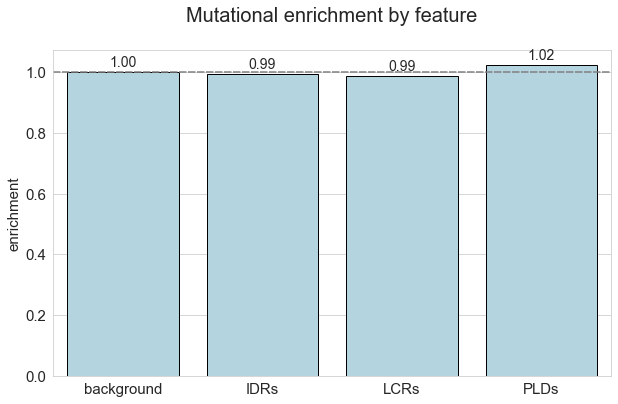

In [56]:
y = [background/background, enrichment_idr, enrichment_lc, enrichment_pld]
sns.set_style("whitegrid")
plt.subplots(figsize=(10,6))
fig = sns.barplot(["background", "IDRs", "LCRs", "PLDs"], y, color='lightblue', edgecolor= 'black')
#plt.hlines(background/background, -1, 4, colors='black', linestyles='dashed')
fig.axhline(background/background, dashes=(5,1), color= 'gray')
plt.title("Mutational enrichment by feature\n", fontdict= {'fontsize':20})
plt.ylabel("enrichment", fontsize=15)
plt.tick_params(labelsize=15)

for i, v in enumerate(y):
    fig.text(i, v+.02, str(f'{v:.2f}'), fontsize= 14, ha= 'center')

#plt.savefig('analysis/bar_enrichment_feature.png', dpi=300)
plt.show()

# What if don't take into account the background

In [57]:
(total_mut_idr_aa/ total_idr_aa)

0.3299718639440622

In [58]:
(total_mut_lc_aa / total_lc_aa)

0.3277450073196375

In [59]:
(total_mut_pld_aa / total_pld_aa)

0.3400735294117647

In [60]:
background

0.3324530232317951

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


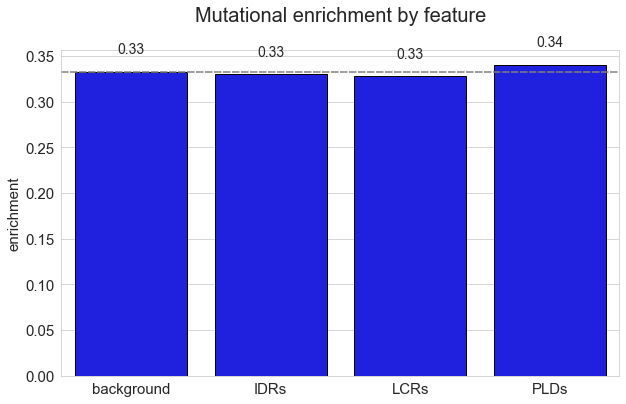

In [61]:
y = [background, (total_mut_idr_aa/ total_idr_aa), (total_mut_lc_aa / total_lc_aa), (total_mut_pld_aa / total_pld_aa)]
sns.set_style("whitegrid")
plt.subplots(figsize=(10,6))
fig = sns.barplot(["background", "IDRs", "LCRs", "PLDs"], y, color='blue', edgecolor= 'black')
#plt.hlines(background/background, -1, 4, colors='black', linestyles='dashed')
fig.axhline(background, dashes=(5,1), color= 'gray')
plt.title("Mutational enrichment by feature\n", fontdict= {'fontsize':20})
plt.ylabel("enrichment", fontsize=15)
plt.tick_params(labelsize=15)

for i, v in enumerate(y):
    fig.text(i, v+.02, str(f'{v:.2f}'), fontsize= 14, ha= 'center')

plt.show()

# Hacer boxplots. Un rate por cada feature

## Control  
por cada proteina, contar el nro. de residuos mutados y hacer el rate con respecto al length de la proteina

In [62]:
# df of no. of mutated aa by protein
mutation_count = mutation_unique.groupby("id_protein").count().reset_index().rename(columns= {'start_aa': 'mutated_aa'}).sort_values('mutated_aa')
mutation_count

,id_protein,mutated_aa
3672,3728,1
2612,2641,1
3696,3756,1
3987,4077,1
3697,3757,1
...,...,...
1340,1351,3341
3411,3450,3384
3318,3355,3519
2335,2358,4692


In [63]:
protein_name = pd.read_csv(
    '../db_tables/protein.tsv',
    sep='\t',
    usecols=['id_protein', 'uniprot_name', 'length']
)

In [64]:
# Bring proteins length and name
protein_name = protein_name.merge(mutation_count).sort_values('mutated_aa')
protein_name

,id_protein,length,uniprot_name,mutated_aa
3672,3728,243,CV046_HUMAN,1
2612,2641,546,ELB3B_HUMAN,1
3696,3756,45,E5RIP5_HUMAN,1
3987,4077,431,UROK_HUMAN,1
3697,3757,189,E5RIU6_HUMAN,1
...,...,...,...,...
1340,1351,3418,BRCA2_HUMAN,3341
3411,3450,5537,KMT2D_HUMAN,3384
3318,3355,4967,RYR2_HUMAN,3519
2335,2358,8797,SYNE1_HUMAN,4692


In [65]:
# delete "_HUMAN"
protein_name.uniprot_name = protein_name.uniprot_name.str.split("_")
protein_name.uniprot_name = protein_name.uniprot_name.map(lambda x: x[0])
protein_name

,id_protein,length,uniprot_name,mutated_aa
3672,3728,243,CV046,1
2612,2641,546,ELB3B,1
3696,3756,45,E5RIP5,1
3987,4077,431,UROK,1
3697,3757,189,E5RIU6,1
...,...,...,...,...
1340,1351,3418,BRCA2,3341
3411,3450,5537,KMT2D,3384
3318,3355,4967,RYR2,3519
2335,2358,8797,SYNE1,4692


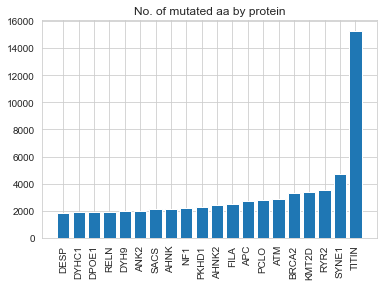

In [66]:
# Proteins with most mutated aa
plt.bar(x= protein_name.uniprot_name[-20:], height= protein_name.mutated_aa[-20:])
plt.xticks(rotation=90)
plt.title("No. of mutated aa by protein")
plt.show()

In [67]:
# Calculate mutational rate
protein_name["ctrl_rate"] =  protein_name.mutated_aa / protein_name.length
#protein_name = protein_name.sort_values('ctrl_rate')
protein_name.sort_values("ctrl_rate")

,id_protein,length,uniprot_name,mutated_aa,ctrl_rate
2391,2415,7570,DYST,1,0.000132
1515,1526,2266,ELYS,1,0.000441
368,372,1732,TRPM3,1,0.000577
347,351,2896,PRC2C,2,0.000691
3062,3096,1447,AGRL3,1,0.000691
...,...,...,...,...,...
74,75,393,P53,392,0.997455
5021,5156,156,CDN2A,157,1.006410
1719,1735,103,S10AG,139,1.349515
563,568,223,CC124,327,1.466368


In [68]:
protein_name[protein_name.ctrl_rate > 1]

,id_protein,length,uniprot_name,mutated_aa,ctrl_rate
1719,1735,103,S10AG,139,1.349515
5021,5156,156,CDN2A,157,1.006410
617,623,117,RL34,318,2.717949
563,568,223,CC124,327,1.466368


In [69]:
# 4 entradas. Eliminar
protein_name = protein_name[protein_name.ctrl_rate <= 1]
protein_name.sort_values("ctrl_rate")

,id_protein,length,uniprot_name,mutated_aa,ctrl_rate
2391,2415,7570,DYST,1,0.000132
1515,1526,2266,ELYS,1,0.000441
368,372,1732,TRPM3,1,0.000577
347,351,2896,PRC2C,2,0.000691
3062,3096,1447,AGRL3,1,0.000691
...,...,...,...,...,...
1044,1052,543,CHK2,532,0.979742
890,897,1360,MSH6,1339,0.984559
372,376,1863,BRCA1,1838,0.986581
791,798,403,PTEN,398,0.987593


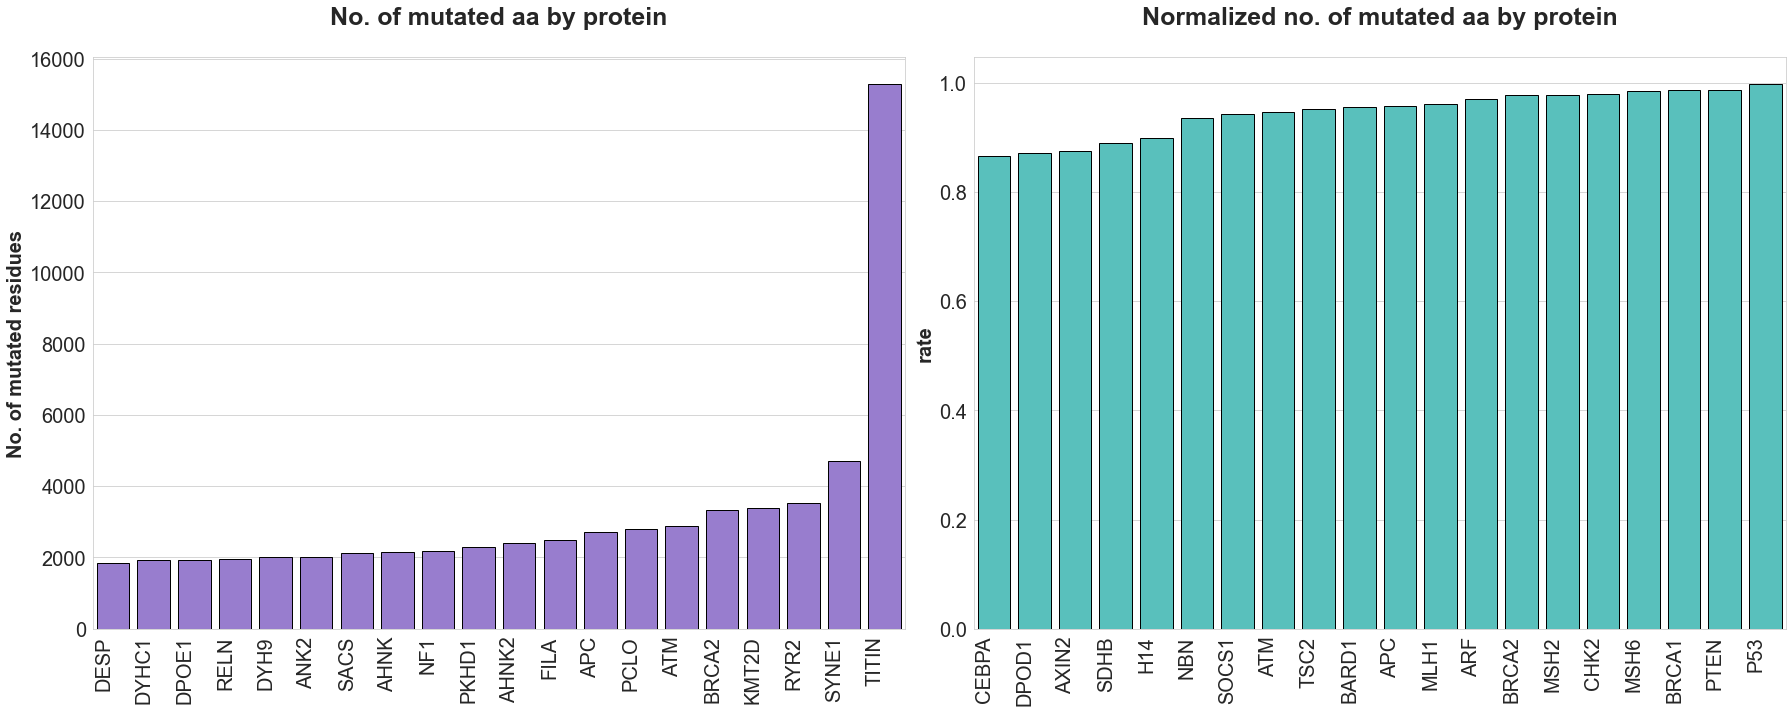

In [70]:
# Subplots
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,2, figsize=(25,10))


sns.barplot(ax= ax[0], x= protein_name.uniprot_name[-20:], y= protein_name.mutated_aa[-20:], edgecolor= 'black', color='mediumpurple')
ax[0].set_title("No. of mutated aa by protein\n", fontsize=25, weight='bold')
ax[0].set_ylabel ("No. of mutated residues", fontsize=20, weight='bold')
ax[0].set_xlabel("")
ax[0].tick_params(labelsize=20)


#####
sns.barplot(ax=ax[1], x= protein_name[protein_name.ctrl_rate <=1].sort_values('ctrl_rate').uniprot_name[-20:], y= protein_name[protein_name.ctrl_rate <=1].sort_values('ctrl_rate').ctrl_rate[-20:], edgecolor= 'black', color='mediumturquoise')
ax[1].tick_params(labelsize=20)
ax[1].set_title("Normalized no. of mutated aa by protein\n", fontsize=25, weight='bold')
ax[1].set_ylabel("rate", fontsize=20, weight='bold')
ax[1].set_xlabel("")

fig.autofmt_xdate(rotation=90)

plt.tight_layout()
#plt.savefig('analysis/mutations_protein.png', dpi=300)
plt.show()

In [71]:
# # Add protein length 
# mutation_count = mutation_count.merge(protein)
# # Calculate mutations rate
# mutation_count["rate"] = mutation_count.mutated_aa / mutation_count.length
# mutation_count

## IDRs

In [72]:
dis_mutations

,id_mutation,id_idr,start,end,length,id_protein,start_aa,ctrl
0,35995,7538,1,286,286,1,49,True
1,35996,7538,1,286,286,1,51,True
2,35997,7538,1,286,286,1,97,True
3,35998,7540,444,526,83,1,488,True
4,35999,7538,1,286,286,1,64,True
...,...,...,...,...,...,...,...,...
256124,738056,3393,260,325,66,5738,263,True
256126,738065,3393,260,325,66,5738,282,True
256127,738067,3393,260,325,66,5738,295,True
256128,1581702,3393,260,325,66,5738,273,True


In [73]:
# Nro de posiciones mutadas por region IDR
# start_aa es la posicion de la mutacion
idr_count = dis_mutations.groupby("id_idr")['start_aa'].count().sort_values(ascending=False).reset_index().rename(columns= {'start_aa': 'mutated_aa'})
# Add IDR length
idr_count = idr_count.merge(dis_mutations[['id_idr', 'length']].drop_duplicates())
idr_count

,id_idr,mutated_aa,length
0,7430,2314,3717
1,4383,752,1992
2,6679,669,1117
3,812,583,896
4,6685,581,1016
...,...,...,...
8092,2030,1,27
8093,540,1,37
8094,2022,1,22
8095,6864,1,21


In [74]:
# Calculate IDR's mutational rate
idr_count["rate"] = idr_count.mutated_aa / idr_count.length
idr_count.sort_values('rate')

,id_idr,mutated_aa,length,rate
8058,2622,1,216,0.004630
8027,2623,2,422,0.004739
8007,2621,2,257,0.007782
8023,3034,2,237,0.008439
8072,4440,1,113,0.008850
...,...,...,...,...
1661,7602,30,30,1.000000
1085,5774,40,40,1.000000
2597,465,21,21,1.000000
1301,5946,36,36,1.000000


In [75]:
#dis_mutations[dis_mutations.id_idr == 6840].sort_values('start_aa')

In [76]:
#disorder_region[disorder_region.id_idr == 6840]

In [77]:
#mutation_has_disorder[mutation_has_disorder.id_idr == 6840]

Text(0.5, 1.0, 'IDRs mutations rate')

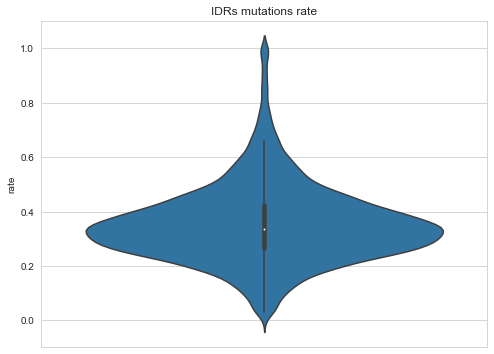

In [78]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(y= idr_count.rate)
ax.set_title("IDRs mutations rate")

## Low-complexity

In [79]:
lc_mutations[['id_lc', 'length']].drop_duplicates()

,id_lc,length
0,15785,88
3,15788,58
5,15787,55
8,15786,156
203,15648,23
...,...,...
154996,6805,12
154998,6803,64
155011,14495,20
155013,14497,11


In [80]:
# Cols: id_idr, nro de residuos mutados, length de la region
lc_count = lc_mutations.groupby("id_lc")["position"].count().sort_values().reset_index().rename(columns= {'position': 'mutated_aa'})
# Add length column
lc_count = lc_count.merge(lc_mutations[['id_lc', 'length']].drop_duplicates())
# Calculate mutations rate
lc_count['rate'] = lc_count.mutated_aa / lc_count.length
lc_count

,id_lc,mutated_aa,length,rate
0,4167,1,13,0.076923
1,5742,1,16,0.062500
2,11886,1,11,0.090909
3,14722,1,8,0.125000
4,13419,1,10,0.100000
...,...,...,...,...
16809,16396,96,111,0.864865
16810,9129,100,208,0.480769
16811,10262,153,388,0.394330
16812,1556,172,249,0.690763


## PLD

In [81]:
pld_mutations

,id_protein,id_pfam,start,end,position
0,1,PLD7,120,179,120
1,1,PLD7,120,179,123
2,1,PLD7,120,179,128
3,1,PLD7,120,179,135
5,1,PLD7,120,179,136
...,...,...,...,...,...
3659,5741,PLD73,112,171,154
3662,5741,PLD73,112,171,156
3663,5741,PLD73,112,171,160
3664,5741,PLD73,112,171,165


In [82]:
pld_mutations.id_pfam.value_counts()

PLD121    48
PLD2      44
PLD3      40
PLD43     39
PLD11     39
          ..
PLD45     10
PLD106     9
PLD53      9
PLD82      1
PLD13      1
Name: id_pfam, Length: 127, dtype: int64

In [83]:
protein_has_pfam_domain[['id_pfam', 'length']]

,id_pfam,length
8933,PLD1,60
10603,PLD10,60
12673,PLD100,60
11480,PLD101,60
11340,PLD102,60
...,...,...
218,PLD95,60
9794,PLD96,60
1756,PLD97,60
10363,PLD98,60


In [84]:
pld_count = pld_mutations.groupby("id_pfam")["position"].count().sort_values(ascending=False).reset_index().rename(columns={'position': 'mutated_aa'})
pld_count = pld_count.merge(protein_has_pfam_domain[['id_pfam', 'length']])
pld_count["rate"] = pld_count.mutated_aa / pld_count.length
pld_count

,id_pfam,mutated_aa,length,rate
0,PLD121,48,60,0.800000
1,PLD2,44,60,0.733333
2,PLD3,40,60,0.666667
3,PLD43,39,60,0.650000
4,PLD11,39,60,0.650000
...,...,...,...,...
122,PLD71,10,60,0.166667
123,PLD53,9,60,0.150000
124,PLD106,9,60,0.150000
125,PLD13,1,60,0.016667


# Plot
**control** is all the LLPS proteins mutational rate (no_mutated_aa / protein_length)

In [85]:
df = pd.DataFrame({'control': protein_name.ctrl_rate, 'idr': idr_count.rate, 'lcr': lc_count.rate, 'pld': pld_count.rate})
df

,control,idr,lcr,pld
0,0.429658,0.622545,0.076923,0.800000
1,0.416139,0.377510,0.062500,0.733333
2,0.025338,0.598926,0.090909,0.666667
3,0.323671,0.650670,0.125000,0.650000
4,0.365854,0.571850,0.100000,0.650000
...,...,...,...,...
16809,NaN,NaN,0.864865,NaN
16810,NaN,NaN,0.480769,NaN
16811,NaN,NaN,0.394330,NaN
16812,NaN,NaN,0.690763,NaN


In [86]:
# No. of points in control set
df.control.notna().sum()

5575

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16814 entries, 0 to 16813
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   control  5575 non-null   float64
 1   idr      8097 non-null   float64
 2   lcr      16814 non-null  float64
 3   pld      127 non-null    float64
dtypes: float64(4)
memory usage: 656.8 KB


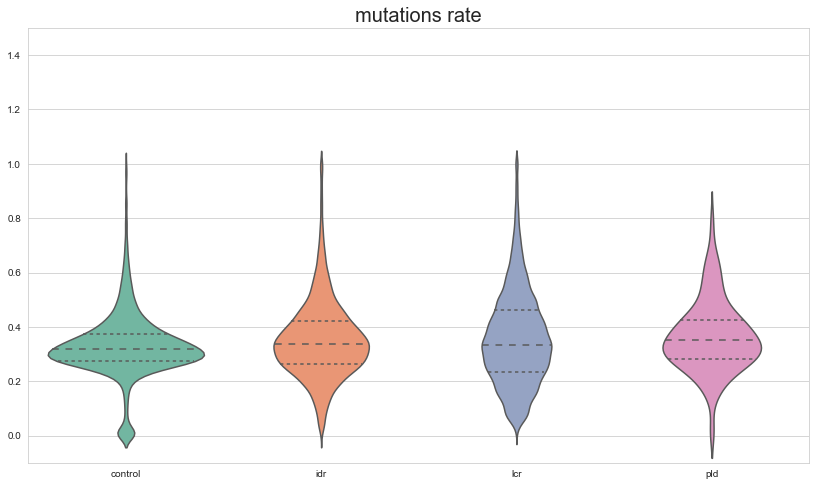

In [88]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.violinplot(data=df, edgecolor="gray", palette='Set2', inner='quartile')
ax.set_title("mutations rate", fontdict={'size': 20})
plt.ylim(-0.1, 1.5)
plt.show()

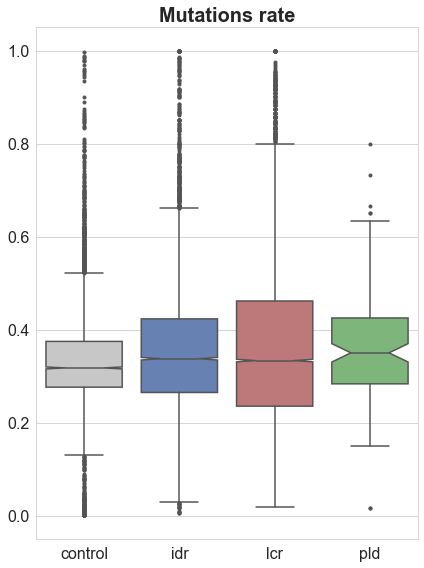

In [89]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6,8))
colors = ['#c7c7c7', "#597dbf","#c86e6e", "#75bf70"]
ax = sns.boxplot(data=df, palette= colors, notch= True, flierprops= dict(marker='o', markersize=3)) #, showfliers= False
#sns.stripplot(data=df, color = '.3', alpha = 0.1)
ax.set_title("Mutations rate", fontdict={'size': 20, 'weight': 'bold'})
plt.ylim(-0.05, 1.05)
plt.xticks(size= 16)
plt.yticks(size=16)
plt.tight_layout()
#plt.savefig('analysis/mutations_rate.png', dpi=300)
plt.show()

# Ahora juntar idr, lcr y pld como todo desorden

In [90]:
control = df.control.dropna().to_frame()
all_disorder = pd.concat([df.idr.dropna(), df.lcr.dropna(), df.pld.dropna()], ignore_index= True).to_frame()
all_disorder.rename(columns={0: "all_disorder"}, inplace= True)

In [91]:
sns.color_palette('Set2')[1]

(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)

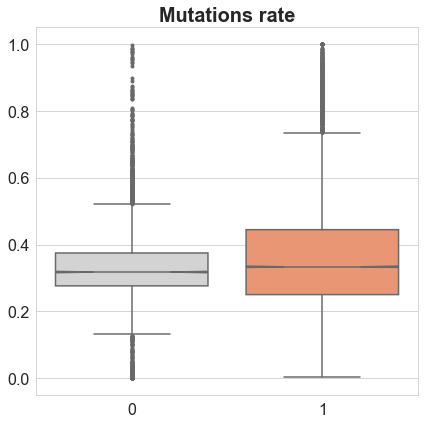

In [92]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(data= [control, all_disorder], palette= {0: 'lightgray', 1: (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)}, notch= True, flierprops= dict(marker='o', markersize=3)) #, showfliers= False
ax.set_title("Mutations rate", fontdict={'size': 20, 'weight': 'bold'})
plt.ylim(-0.05, 1.05)
plt.xticks(size= 16)
plt.yticks(size=16)
plt.tight_layout()
#plt.savefig('analysis/mutations_rate.png', dpi=300)
plt.show()

In [93]:
all_disorder

,all_disorder
0,0.622545
1,0.377510
2,0.598926
3,0.650670
4,0.571850
...,...
25033,0.166667
25034,0.150000
25035,0.150000
25036,0.016667


In [94]:
df = df.append(all_disorder)
df

,control,idr,lcr,pld,all_disorder
0,0.429658,0.622545,0.076923,0.800000,NaN
1,0.416139,0.377510,0.062500,0.733333,NaN
2,0.025338,0.598926,0.090909,0.666667,NaN
3,0.323671,0.650670,0.125000,0.650000,NaN
4,0.365854,0.571850,0.100000,0.650000,NaN
...,...,...,...,...,...
25033,NaN,NaN,NaN,NaN,0.166667
25034,NaN,NaN,NaN,NaN,0.150000
25035,NaN,NaN,NaN,NaN,0.150000
25036,NaN,NaN,NaN,NaN,0.016667


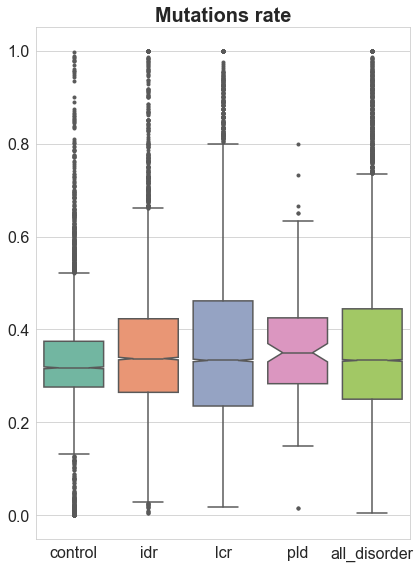

In [97]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6,8))
colors = ['#c7c7c7', "#597dbf","#c86e6e", "#75bf70"]
ax = sns.boxplot(data=df, palette= "Set2", notch= True, flierprops= dict(marker='o', markersize=3)) #, showfliers= False
#sns.stripplot(data=df, color = '.3', alpha = 0.1)
ax.set_title("Mutations rate", fontdict={'size': 20, 'weight': 'bold'})
plt.ylim(-0.05, 1.05)
plt.xticks(size= 16)
plt.yticks(size=16)
plt.tight_layout()
#plt.savefig('analysis/mutations_rate.png', dpi=300)
plt.show()

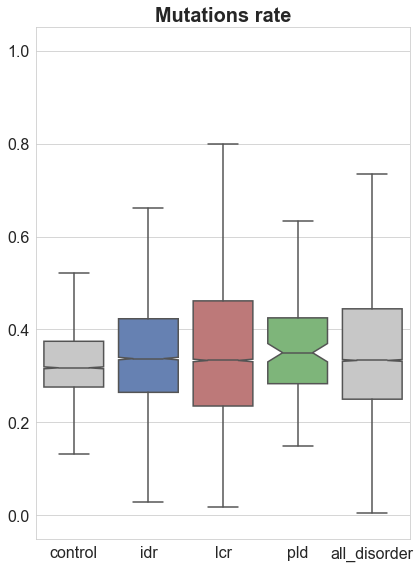

In [98]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6,8))
colors = ['#c7c7c7', "#597dbf","#c86e6e", "#75bf70"]
ax = sns.boxplot(data=df, palette= colors, notch= True, flierprops= dict(marker='o', markersize=3), showfliers = False) #, showfliers= False
#sns.stripplot(data=df, color = '.3', alpha = 0.1)
ax.set_title("Mutations rate", fontdict={'size': 20, 'weight': 'bold'})
plt.ylim(-0.05, 1.05)
plt.xticks(size= 16)
plt.yticks(size=16)
plt.tight_layout()
#plt.savefig('analysis/mutations_rate.png', dpi=300)
plt.show()

In [99]:
df.iloc[:, :-1]

,control,idr,lcr,pld
0,0.429658,0.622545,0.076923,0.800000
1,0.416139,0.377510,0.062500,0.733333
2,0.025338,0.598926,0.090909,0.666667
3,0.323671,0.650670,0.125000,0.650000
4,0.365854,0.571850,0.100000,0.650000
...,...,...,...,...
25033,NaN,NaN,NaN,NaN
25034,NaN,NaN,NaN,NaN
25035,NaN,NaN,NaN,NaN
25036,NaN,NaN,NaN,NaN


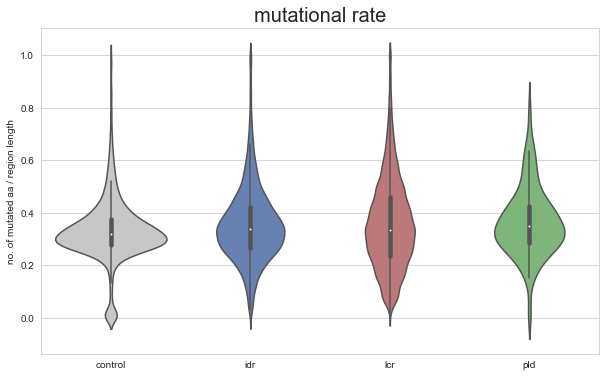

In [100]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(data= df.iloc[:, :-1], edgecolor="gray", palette= colors) # inner='quartile'
ax.set_title("mutational rate", fontdict={'size': 20})
ax.set_ylabel("no. of mutated aa / region length")
#plt.ylim(-0.1, 1.5)
plt.show()

---

In [101]:
# Now make a set of ordered aa. Those that are not in IDRs
protein

,id_protein,length
0,1,526
1,2,632
2,3,592
3,4,414
4,5,656
...,...,...
5736,5737,1608
5737,5738,549
5738,5739,377
5739,5740,482


In [102]:
# exclude all the residuos IDR, LCR and PLD
protein_table = pd.read_csv('../db_tables/protein.tsv', sep= '\t')
protein_table = protein_table[['id_protein', 'length', 'disorder_content']]

In [103]:
protein_table["in_lcr"] = False
protein_table["in_idr"] = False
protein_table["in_pld"] = False

In [104]:
protein_table

,id_protein,length,disorder_content,in_lcr,in_idr,in_pld
0,1,526,0.797,False,False,False
1,2,632,0.340,False,False,False
2,3,592,0.828,False,False,False
3,4,414,0.184,False,False,False
4,5,656,0.649,False,False,False
...,...,...,...,...,...,...
5736,5737,1608,0.175,False,False,False
5737,5738,549,0.157,False,False,False
5738,5739,377,0.058,False,False,False
5739,5740,482,NaN,False,False,False


In [105]:
low_complexity.id_protein.nunique()

4346

In [106]:
disorder_region.id_protein.nunique()

3426

In [107]:
pld_mutations.id_protein.nunique()

127

In [108]:
for ix in protein_table.index:
        if protein_table.id_protein[ix] in low_complexity.id_protein.unique():
            protein_table.in_lcr[ix] = True
        if protein_table.id_protein[ix] in disorder_region.id_protein.unique():
            protein_table.in_idr[ix] = True
        if protein_table.id_protein[ix] in pld_mutations.id_protein.unique():
            protein_table.in_pld[ix] = True

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [109]:
protein_table.sum()

id_protein          16482411.00
length               3718008.00
disorder_content         823.38
in_lcr                  4346.00
in_idr                  3426.00
in_pld                   127.00
dtype: float64

In [110]:
no_disordered_proteins = protein_table[(protein_table.in_lcr == False) & (protein_table.in_idr == False) & (protein_table.in_pld == False)]
no_disordered_proteins

,id_protein,length,disorder_content,in_lcr,in_idr,in_pld
6,7,1241,NaN,False,False,False
9,10,724,NaN,False,False,False
10,11,662,NaN,False,False,False
21,22,217,NaN,False,False,False
29,30,740,NaN,False,False,False
...,...,...,...,...,...,...
5713,5714,376,NaN,False,False,False
5724,5725,271,NaN,False,False,False
5726,5727,1031,NaN,False,False,False
5729,5730,193,NaN,False,False,False


In [111]:
# mutations in disordered proteins
no_disordered_proteins_mut = mutation[mutation.id_protein.isin(no_disordered_proteins.id_protein)][['id_protein', 'start_aa']].drop_duplicates()
no_disordered_proteins_mut

,id_protein,start_aa
462,1100,443
463,1100,366
464,1100,278
465,1100,164
466,1100,93
...,...,...
1659965,4262,222
1659966,4262,296
1660047,4346,436
1660048,4346,459


In [112]:
no_disordered_proteins_mut = no_disordered_proteins_mut.id_protein.value_counts().reset_index().rename(columns= {"index": "id_protein" ,"id_protein": "no_mutated_aa"})
no_disordered_proteins_mut

,id_protein,no_mutated_aa
0,1882,1854
1,564,1719
2,3306,1147
3,2671,1127
4,2034,992
...,...,...
1084,4142,1
1085,3158,1
1086,3737,1
1087,3791,1


In [113]:
# de 1136 proteinas que no tiene IDR, PLD ni LCR, solo 1089 tienen mutaciones
# drop those proteins without mutations
no_disordered_proteins = no_disordered_proteins[no_disordered_proteins.id_protein.isin(no_disordered_proteins_mut.id_protein)]

In [114]:
# Bring all the mutated positions in these proteins
no_disordered_proteins = no_disordered_proteins.merge(
no_disordered_proteins_mut,
how= 'left'
)

In [115]:
no_disordered_proteins["rate"] = no_disordered_proteins.no_mutated_aa / no_disordered_proteins.length
no_disordered_proteins = no_disordered_proteins[no_disordered_proteins.rate <= 1]
no_disordered_proteins

,id_protein,length,disorder_content,in_lcr,in_idr,in_pld,no_mutated_aa,rate
0,7,1241,NaN,False,False,False,691,0.556809
1,10,724,NaN,False,False,False,258,0.356354
2,11,662,NaN,False,False,False,357,0.539275
3,22,217,NaN,False,False,False,69,0.317972
4,30,740,NaN,False,False,False,342,0.462162
...,...,...,...,...,...,...,...,...
1084,5714,376,NaN,False,False,False,113,0.300532
1085,5725,271,NaN,False,False,False,92,0.339483
1086,5727,1031,NaN,False,False,False,270,0.261882
1087,5730,193,NaN,False,False,False,53,0.274611


In [116]:
all_order = no_disordered_proteins.rate.to_frame("all_order")

now to all_order, add the mutational rate in ordered regions

In [182]:
no_disordered_proteins.id_protein.nunique()

1087

In [187]:
# All the non-structured proteins
non_structured_proteins = protein_table[~protein_table.id_protein.isin(no_disordered_proteins.id_protein)]
non_structured_proteins

,id_protein,length,disorder_content,in_lcr,in_idr,in_pld
0,1,526,0.797,True,True,True
1,2,632,0.340,True,True,False
2,3,592,0.828,True,True,True
3,4,414,0.184,True,True,True
4,5,656,0.649,True,True,True
...,...,...,...,...,...,...
5736,5737,1608,0.175,True,True,False
5737,5738,549,0.157,True,True,False
5738,5739,377,0.058,True,True,False
5739,5740,482,NaN,True,False,False


In [190]:
dis_mutations

,id_mutation,id_idr,start,end,length,id_protein,start_aa,ctrl
0,35995,7538,1,286,286,1,49,True
1,35996,7538,1,286,286,1,51,True
2,35997,7538,1,286,286,1,97,True
3,35998,7540,444,526,83,1,488,True
4,35999,7538,1,286,286,1,64,True
...,...,...,...,...,...,...,...,...
256124,738056,3393,260,325,66,5738,263,True
256126,738065,3393,260,325,66,5738,282,True
256127,738067,3393,260,325,66,5738,295,True
256128,1581702,3393,260,325,66,5738,273,True


In [189]:
lc_mutations

,id_mutation,id_lc,start,end,length,id_protein,position,ctrl
0,35995,15785,17,104,88,1,49,True
1,35996,15785,17,104,88,1,51,True
2,35997,15785,17,104,88,1,97,True
3,35998,15788,450,507,58,1,488,True
4,35999,15785,17,104,88,1,64,True
...,...,...,...,...,...,...,...,...
155015,1048084,14495,92,111,20,5740,107,True
155016,1048094,14495,92,111,20,5740,110,True
155019,1048138,14495,92,111,20,5740,99,True
155020,1048141,14495,92,111,20,5740,100,True


In [191]:
pld_mutations

,id_protein,id_pfam,start,end,position
0,1,PLD7,120,179,120
1,1,PLD7,120,179,123
2,1,PLD7,120,179,128
3,1,PLD7,120,179,135
5,1,PLD7,120,179,136
...,...,...,...,...,...
3659,5741,PLD73,112,171,154
3662,5741,PLD73,112,171,156
3663,5741,PLD73,112,171,160
3664,5741,PLD73,112,171,165


: 

---

In [117]:
df = df.append(all_order)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42939 entries, 0 to 1088
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   control       5575 non-null   float64
 1   idr           8097 non-null   float64
 2   lcr           16814 non-null  float64
 3   pld           127 non-null    float64
 4   all_disorder  25038 non-null  float64
 5   all_order     1087 non-null   float64
dtypes: float64(6)
memory usage: 2.3 MB


In [130]:
df.rename(columns= {'control': 'all disphaseDB', 'idr': 'IDRs', 'lcr': 'LCRs', 'pld': 'PLDs'}, inplace= True)

In [132]:
df.columns

Index(['all disphaseDB', 'IDRs', 'LCRs', 'PLDs', 'all_disorder', 'all_order'], dtype='object')

In [135]:
df = df.reindex(['all disphaseDB','all_order', 'all_disorder','IDRs', 'LCRs', 'PLDs'], axis= 1)
df

,all disphaseDB,all_order,all_disorder,IDRs,LCRs,PLDs
0,0.429658,NaN,NaN,0.622545,0.076923,0.800000
1,0.416139,NaN,NaN,0.377510,0.062500,0.733333
2,0.025338,NaN,NaN,0.598926,0.090909,0.666667
3,0.323671,NaN,NaN,0.650670,0.125000,0.650000
4,0.365854,NaN,NaN,0.571850,0.100000,0.650000
...,...,...,...,...,...,...
1084,NaN,0.300532,NaN,NaN,NaN,NaN
1085,NaN,0.339483,NaN,NaN,NaN,NaN
1086,NaN,0.261882,NaN,NaN,NaN,NaN
1087,NaN,0.274611,NaN,NaN,NaN,NaN


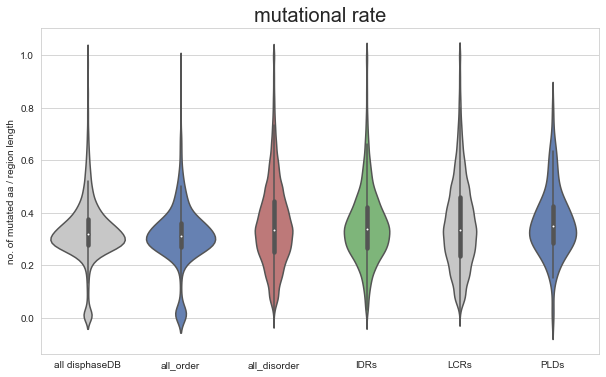

In [136]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(data=df, edgecolor="gray", palette= colors) # inner='quartile'
ax.set_title("mutational rate", fontdict={'size': 20})
ax.set_ylabel("no. of mutated aa / region length")
#plt.ylim(-0.1, 1.5)
plt.show()

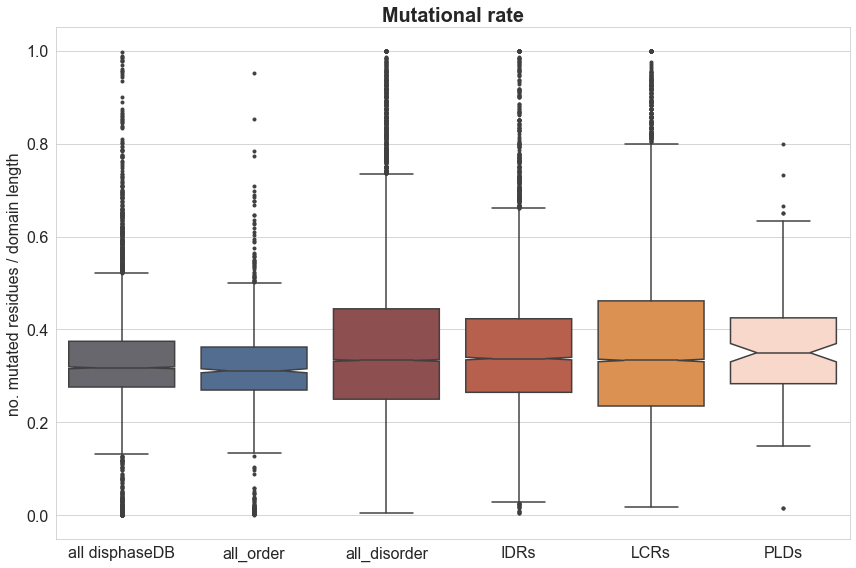

In [179]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,8))
colors = ["#66666E", "#476C9B", '#984447', "#C8553D", "#F28F3B", "#FFD5C2", "E5D4CE"]
ax = sns.boxplot(data=df, palette= colors, notch= True, flierprops= dict(marker='o', markersize=3)) #, showfliers= False
#sns.stripplot(data=df, color = '.3', alpha = 0.1)
ax.set_title("Mutational rate", fontdict={'size': 20, 'weight': 'bold'})
plt.ylabel("no. mutated residues / domain length", size= 16)
plt.ylim(-0.05, 1.05)
plt.xticks(size= 16)
plt.yticks(size=16)
plt.tight_layout()
#plt.savefig('analysis/mutations_rate.png', dpi=300)
plt.show()

---

In [120]:
# add id_protein col
prueba_idr = idr_count[['id_idr', 'rate']].merge(disorder_region[['id_idr', 'id_protein']], how= 'left').sort_values('id_protein')
prueba_idr

,id_idr,rate,id_protein
709,7540,0.626506,1
1972,7539,0.520000,1
115,7538,0.402098,1
280,7468,0.431579,2
4887,7467,0.480000,2
...,...,...,...
4062,1197,0.466667,5737
3335,1196,0.500000,5737
5843,3394,0.450000,5738
2673,3393,0.318182,5738


In [121]:
# add id_protein col
prueba_lc = lc_count[['id_lc', 'rate']].merge(low_complexity[['id_lc', 'id_protein']]).sort_values("id_protein")
prueba_lc

,id_lc,rate,id_protein
16716,15788,0.603448,1
16617,15787,0.509091,1
16698,15785,0.386364,1
16798,15786,0.416667,1
5048,15647,0.307692,2
...,...,...,...
8086,6803,0.078125,5739
8088,6804,0.357143,5739
8533,14495,0.300000,5740
149,14497,0.090909,5740


In [122]:
prueba_lc.merge(prueba_idr, how= 'outer', on='id_protein')

,id_lc,rate_x,id_protein,id_idr,rate_y
0,15788.0,0.603448,1,7540.0,0.626506
1,15788.0,0.603448,1,7539.0,0.520000
2,15788.0,0.603448,1,7538.0,0.402098
3,15787.0,0.509091,1,7540.0,0.626506
4,15787.0,0.509091,1,7539.0,0.520000
...,...,...,...,...,...
65475,NaN,NaN,5603,4853.0,0.250000
65476,NaN,NaN,5613,1755.0,0.166667
65477,NaN,NaN,5672,273.0,0.500000
65478,NaN,NaN,5697,7343.0,0.138889


In [123]:
prueba.sort_values("id_protein")

NameError: name 'prueba' is not defined

In [ ]:
prueba.merge()

In [ ]:
# add id_protein col
pld_count.merge(protein_has_pfam_domain[['id_pfam', 'id_protein']])

,id_pfam,mutated_aa,length,rate,id_protein
0,PLD121,48,60,0.800000,3491
1,PLD2,44,60,0.733333,3450
2,PLD3,40,60,0.666667,94
3,PLD43,39,60,0.650000,5588
4,PLD11,39,60,0.650000,337
...,...,...,...,...,...
122,PLD71,10,60,0.166667,1021
123,PLD53,9,60,0.150000,57
124,PLD106,9,60,0.150000,5552
125,PLD13,1,60,0.016667,3


# Other aproach: count the total no. of mutations per each residue